*Single Task & Multi-Task based Architectures Implementation*

EDA

### DATASET 1 : 🧠EPIC & CSCR Dataset : Epic Healthcare LTD, সেন্টার ফর স্পেসালাইজড কেয়ার এবং রিসার্চ (সিএসসিআর) 
- Annotated Dataset for Brain Tumor Image Segmentation and Classification

- https://www.kaggle.com/datasets/sunandabiswas24/brain-mri-image-dataset

#### ✅Import & Install dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning) 

In [8]:
!pip install tensorflow
# To install Keras
!pip install -q tensorflow keras keras-cv
import tensorflow as tf
import keras_cv
import pandas as pd
print("TensorFlow version:", tf.__version__)
print("KerasCV version:", keras_cv.__version__)                             


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\sunan\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\sunan\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\sunan\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\req_command.py", line 68, in wrapper
    return func(self, options, args)
  File "C:\Users\sunan\AppData\Roaming\Python\Python39\site-packages\pip\_internal\commands\install.py", line 486, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\sunan\AppData\Roaming\Python\Python39\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return p

ModuleNotFoundError: No module named 'tensorflow_datasets'

#### Upload and Unzip Dataset


In [3]:
import zipfile
import os

# 📁 Specify the path to your zip file
zip_path = "D:\CSCR hospital Dataset.zip"  # Update this if your file is in a different location
extract_dir = "Brain_Tumor_Dataset"

# ✅ Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"✅ Files extracted to: {extract_dir}")

✅ Files extracted to: Brain_Tumor_Dataset


#### 🔍 Checking Folder Structure 


In [4]:
# ✅ Optional: print directory structure to verify
for root, dirs, files in os.walk(extract_dir):
    print(root, "->", len(files), "files")

Brain_Tumor_Dataset -> 0 files
Brain_Tumor_Dataset\Epic and CSCR hospital Dataset -> 0 files
Brain_Tumor_Dataset\Epic and CSCR hospital Dataset\Test -> 0 files
Brain_Tumor_Dataset\Epic and CSCR hospital Dataset\Test\glioma -> 755 files
Brain_Tumor_Dataset\Epic and CSCR hospital Dataset\Test\meningioma -> 546 files
Brain_Tumor_Dataset\Epic and CSCR hospital Dataset\Test\notumor -> 487 files
Brain_Tumor_Dataset\Epic and CSCR hospital Dataset\Test\pituitary -> 626 files
Brain_Tumor_Dataset\Epic and CSCR hospital Dataset\Train -> 0 files
Brain_Tumor_Dataset\Epic and CSCR hospital Dataset\Train\glioma -> 3018 files
Brain_Tumor_Dataset\Epic and CSCR hospital Dataset\Train\meningioma -> 2183 files
Brain_Tumor_Dataset\Epic and CSCR hospital Dataset\Train\notumor -> 1945 files
Brain_Tumor_Dataset\Epic and CSCR hospital Dataset\Train\pituitary -> 2504 files


##### 🗂 4. Load Images and Labels ==>Preprocess dataset (images + labels)


In [6]:
import os

image_paths = []
image_labels = []

# ✅ Correct root folder
data_root = os.path.join("Brain_Tumor_Dataset", "Epic and CSCR hospital Dataset")

# ✅ Use correct folder names: Train and Test
for split in ["Train", "Test"]:
    split_path = os.path.join(data_root, split)
    for label in os.listdir(split_path):
        label_path = os.path.join(split_path, label)
        if os.path.isdir(label_path):
            for fname in os.listdir(label_path):
                if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                    image_paths.append(os.path.join(label_path, fname))
                    image_labels.append(label)

# ✅ Summary
classes = sorted(set(image_labels))
print("Classes:", classes)
print("Total samples:", len(image_paths))


Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Total samples: 12064


In [11]:
import pandas as pd

In [16]:
import os
import pandas as pd

# ✅ Root dataset path
data_root = os.path.join("Brain_Tumor_Dataset", "Epic and CSCR hospital Dataset")

image_paths = []
image_labels = []

# ✅ Traverse both Train and Test splits
for split in ["Train", "Test"]:
    split_path = os.path.join(data_root, split)
    if not os.path.exists(split_path):
        continue
    for label in os.listdir(split_path):
        label_path = os.path.join(split_path, label)
        if os.path.isdir(label_path):
            for fname in os.listdir(label_path):
                if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                    image_paths.append(os.path.join(label_path, fname))
                    image_labels.append(label)

# ✅ Make DataFrame
df = pd.DataFrame({"image_path": image_paths, "label": image_labels})

# ✅ Summary
classes = sorted(df["label"].unique())
print("Classes:", classes)
print("Total samples:", len(df))
print(df.head())


Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Total samples: 12064
                                          image_path   label
0  Brain_Tumor_Dataset\Epic and CSCR hospital Dat...  glioma
1  Brain_Tumor_Dataset\Epic and CSCR hospital Dat...  glioma
2  Brain_Tumor_Dataset\Epic and CSCR hospital Dat...  glioma
3  Brain_Tumor_Dataset\Epic and CSCR hospital Dat...  glioma
4  Brain_Tumor_Dataset\Epic and CSCR hospital Dat...  glioma


In [17]:
df

,image_path,label
0,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,glioma
1,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,glioma
2,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,glioma
3,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,glioma
4,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,glioma
...,...,...
12059,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,pituitary
12060,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,pituitary
12061,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,pituitary
12062,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,pituitary


In [18]:
df.shape

(12064, 2)

In [19]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [20]:
df.duplicated().sum()

0

In [21]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  12064 non-null  object
 1   label       12064 non-null  object
dtypes: object(2)
memory usage: 188.6+ KB


In [23]:
df['label'].unique()

array(['glioma', 'meningioma', 'notumor', 'pituitary'], dtype=object)

In [24]:
df['label'].value_counts()

glioma        3773
pituitary     3130
meningioma    2729
notumor       2432
Name: label, dtype: int64

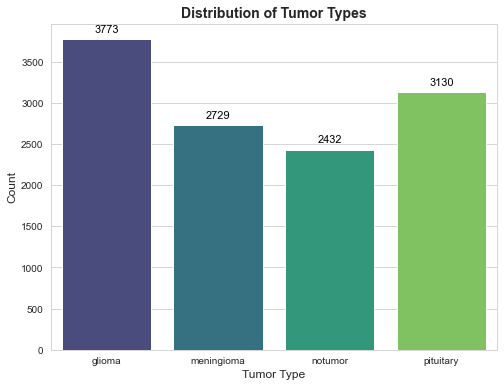

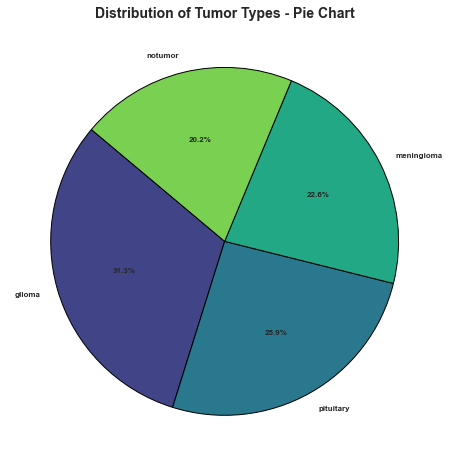

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis", ax=ax)

ax.set_title("Distribution of Tumor Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

label_counts = df["label"].value_counts()

fig, ax = plt.subplots(figsize=(10, 8))
colors = sns.color_palette("viridis", len(label_counts))

ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', 
       startangle=140, colors=colors, textprops={'fontsize': 8, 'weight': 'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1})

ax.set_title("Distribution of Tumor Types - Pie Chart", fontsize=14, fontweight='bold')

plt.show()

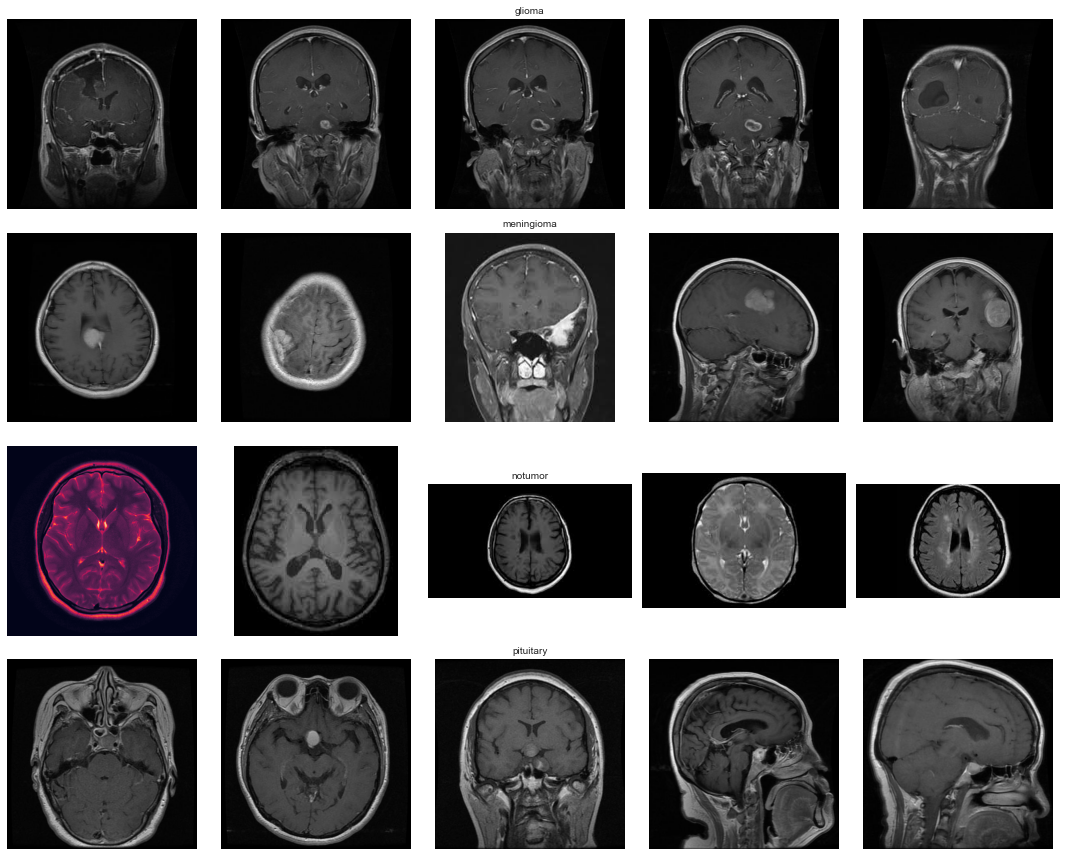

In [26]:
from PIL import Image

num_images = 5

unique_labels = df['label'].unique()

plt.figure(figsize=(15, len(unique_labels) * 3))

for row_idx, label in enumerate(unique_labels):
  
    label_images = df[df['label'] == label].head(num_images)['image_path'].tolist()
    
    for col_idx, img_path in enumerate(label_images):
        plt_idx = row_idx * num_images + col_idx + 1
        plt.subplot(len(unique_labels), num_images, plt_idx)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off')
        if col_idx == 2:  
            plt.title(label, fontsize=10)

plt.tight_layout()
plt.show()

In [27]:
max_samples = df['label'].value_counts().max()

balanced_df = df.groupby('label', group_keys=False).apply(
    lambda x: x.sample(n=max_samples, replace=True, random_state=42)
).reset_index(drop=True)

balanced_df = balanced_df[['image_path', 'label']]

In [29]:
df_balanced = balanced_df
df_balanced

,image_path,label
0,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,glioma
1,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,glioma
2,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,glioma
3,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,glioma
4,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,glioma
...,...,...
15087,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,pituitary
15088,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,pituitary
15089,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,pituitary
15090,Brain_Tumor_Dataset\Epic and CSCR hospital Dat...,pituitary


### DATASET 2 : 🧠 BRISC 2025
- Annotated Dataset for Brain Tumor Image Segmentation and Classification

- https://www.kaggle.com/code/nirmalgaud/brain-tumor-classification-with-mobiledenseattn

In [33]:
!pip install kagglehub

  Using cached kagglehub-0.3.13-py3-none-any.whl.metadata (38 kB)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\sunan\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\sunan\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\sunan\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\req_command.py", line 68, in wrapper
    return func(self, options, args)
  File "C:\Users\sunan\AppData\Roaming\Python\Python39\site-packages\pip\_internal\commands\install.py", line 486, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\sunan\AppData\Roaming\Python\Python39\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return p

    raise InvalidVersion(f"Invalid version: {version!r}")
pip._vendor.packaging.version.InvalidVersion: Invalid version: '4.0.0-unsupported'


In [38]:
import zipfile
import os

# 📁 Specify the path to your zip file
zip_path = r"C:\Users\sunan\Downloads\BRISC2025.zip"  
# Update this if your file is in a different location
extract_dir = "Brain_Tumor_Dataset_2"

# ✅ Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"✅ Files extracted to: {extract_dir}")

✅ Files extracted to: Brain_Tumor_Dataset_2


In [40]:
# ✅ Optional: print directory structure to verify
for root, dirs, files in os.walk(extract_dir):
    print(root, "->", len(files), "files")

Brain_Tumor_Dataset_2 -> 0 files
Brain_Tumor_Dataset_2\brisc2025 -> 0 files
Brain_Tumor_Dataset_2\brisc2025\classification_task -> 0 files
Brain_Tumor_Dataset_2\brisc2025\classification_task\test -> 0 files
Brain_Tumor_Dataset_2\brisc2025\classification_task\test\glioma -> 254 files
Brain_Tumor_Dataset_2\brisc2025\classification_task\test\meningioma -> 306 files
Brain_Tumor_Dataset_2\brisc2025\classification_task\test\no_tumor -> 140 files
Brain_Tumor_Dataset_2\brisc2025\classification_task\test\pituitary -> 300 files
Brain_Tumor_Dataset_2\brisc2025\classification_task\train -> 0 files
Brain_Tumor_Dataset_2\brisc2025\classification_task\train\glioma -> 1147 files
Brain_Tumor_Dataset_2\brisc2025\classification_task\train\meningioma -> 1329 files
Brain_Tumor_Dataset_2\brisc2025\classification_task\train\no_tumor -> 1067 files
Brain_Tumor_Dataset_2\brisc2025\classification_task\train\pituitary -> 1457 files
Brain_Tumor_Dataset_2\brisc2025\segmentation_task -> 0 files
Brain_Tumor_Dataset_2

In [52]:
import os

# ✅ Correct root path (raw string)
root_path = r"C:\Users\sunan\Downloads\brisc2025\classification_task\train"

image_paths = []
labels = []

for label in os.listdir(root_path):
    label_path = os.path.join(root_path, label)
    if os.path.isdir(label_path):
        for fname in os.listdir(label_path):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(label_path, fname))
                labels.append(label)

print("Total images:", len(image_paths))
print("Classes:", sorted(set(labels)))


Total images: 5000
Classes: ['glioma', 'meningioma', 'no_tumor', 'pituitary']


In [53]:
import os
import pandas as pd

# ✅ Root dataset path

data_root = os.path.join("brisc2025", "classification_task")

image_paths = []
image_labels = []

# ✅ Traverse both Train and Test splits
for split in ["Train", "Test"]:
    split_path = os.path.join(data_root, split)
    if not os.path.exists(split_path):
        continue
    for label in os.listdir(split_path):
        label_path = os.path.join(split_path, label)
        if os.path.isdir(label_path):
            for fname in os.listdir(label_path):
                if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                    image_paths.append(os.path.join(label_path, fname))
                    image_labels.append(label)

# ✅ Make DataFrame
df = pd.DataFrame({"image_path": image_paths, "label": image_labels})

# ✅ Summary
classes = sorted(df["label"].unique())
print("Classes:", classes)
print("Total samples:", len(df))
print(df.head())


Classes: ['glioma', 'meningioma', 'no_tumor', 'pituitary']
Total samples: 6000
                                          image_path   label
0  brisc2025\classification_task\Train\glioma\bri...  glioma
1  brisc2025\classification_task\Train\glioma\bri...  glioma
2  brisc2025\classification_task\Train\glioma\bri...  glioma
3  brisc2025\classification_task\Train\glioma\bri...  glioma
4  brisc2025\classification_task\Train\glioma\bri...  glioma


In [54]:
df

,image_path,label
0,brisc2025\classification_task\Train\glioma\bri...,glioma
1,brisc2025\classification_task\Train\glioma\bri...,glioma
2,brisc2025\classification_task\Train\glioma\bri...,glioma
3,brisc2025\classification_task\Train\glioma\bri...,glioma
4,brisc2025\classification_task\Train\glioma\bri...,glioma
...,...,...
5995,brisc2025\classification_task\Test\pituitary\b...,pituitary
5996,brisc2025\classification_task\Test\pituitary\b...,pituitary
5997,brisc2025\classification_task\Test\pituitary\b...,pituitary
5998,brisc2025\classification_task\Test\pituitary\b...,pituitary


In [55]:
df.shape

(6000, 2)

In [56]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [57]:
df.duplicated().sum()

0

In [58]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  6000 non-null   object
 1   label       6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


In [60]:
df['label'].unique()

array(['glioma', 'meningioma', 'no_tumor', 'pituitary'], dtype=object)

In [61]:
df['label'].value_counts()

pituitary     1757
meningioma    1635
glioma        1401
no_tumor      1207
Name: label, dtype: int64

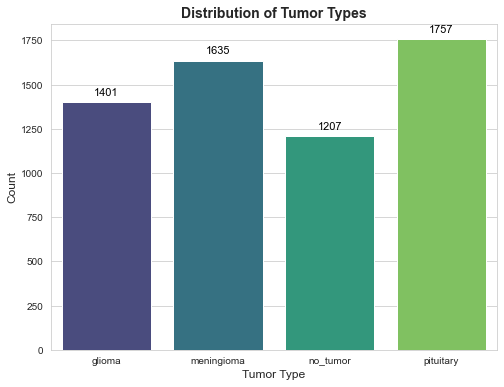

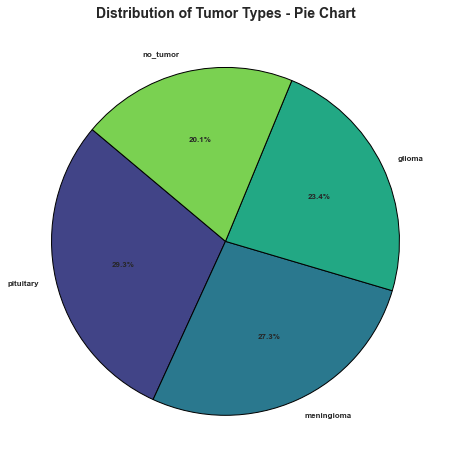

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis", ax=ax)

ax.set_title("Distribution of Tumor Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

label_counts = df["label"].value_counts()

fig, ax = plt.subplots(figsize=(10, 8))
colors = sns.color_palette("viridis", len(label_counts))

ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', 
       startangle=140, colors=colors, textprops={'fontsize': 8, 'weight': 'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1})

ax.set_title("Distribution of Tumor Types - Pie Chart", fontsize=14, fontweight='bold')

plt.show()

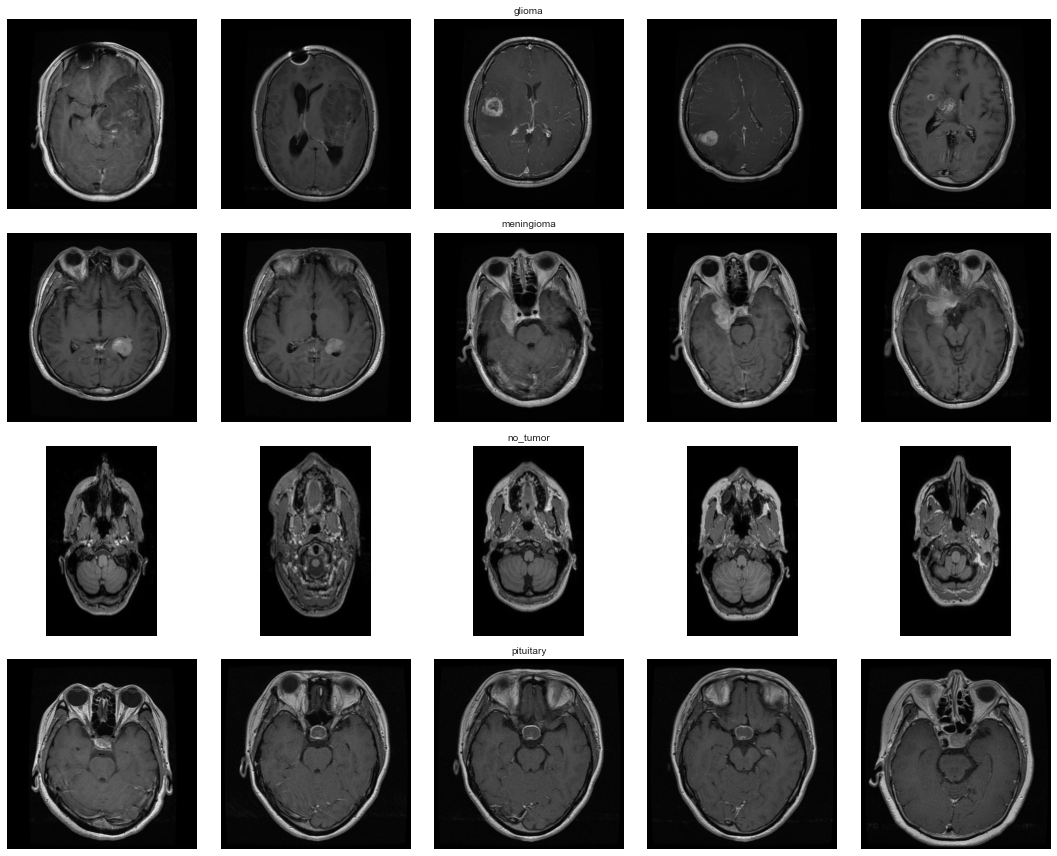

In [64]:
from PIL import Image

num_images = 5

unique_labels = df['label'].unique()

plt.figure(figsize=(15, len(unique_labels) * 3))

for row_idx, label in enumerate(unique_labels):
  
    label_images = df[df['label'] == label].head(num_images)['image_path'].tolist()
    
    for col_idx, img_path in enumerate(label_images):
        plt_idx = row_idx * num_images + col_idx + 1
        plt.subplot(len(unique_labels), num_images, plt_idx)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off')
        if col_idx == 2:  
            plt.title(label, fontsize=10)

plt.tight_layout()
plt.show()

### *Merging Two Dataset together category wise to make the dataset large*

In [83]:
import os
import pandas as pd

def collect_dataset(root, splits=("train", "test")):
    records = []
    for split in splits:
        split_path = os.path.join(root, split)
        if not os.path.exists(split_path):
            continue
        for label in os.listdir(split_path):
            label_path = os.path.join(split_path, label)
            if os.path.isdir(label_path):
                for fname in os.listdir(label_path):
                    if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                        records.append({
                            "image_path": os.path.join(label_path, fname),
                            "label": label,
                            "split": split
                        })
    return pd.DataFrame(records)

# ✅ Dataset A (CSCR/Epic)
cscr_root = r"C:\Users\sunan\Downloads\Brain_Tumor_Dataset\Epic and CSCR hospital Dataset"
df_cscr = collect_dataset(cscr_root, splits=("Train", "Test"))
df_cscr["split"] = df_cscr["split"].str.lower()  # normalize

# ✅ Dataset B (BRISC2025)
brisc_root = r"C:\Users\sunan\Downloads\brisc2025\classification_task"
df_brisc = collect_dataset(brisc_root, splits=("train", "test"))

# ✅ Merge both
df_all = pd.concat([df_cscr, df_brisc], ignore_index=True)

print("CSCR shape:", df_cscr.shape)
print("BRISC shape:", df_brisc.shape)
print("Combined shape:", df_all.shape)
print("\nClasses:", df_all["label"].unique())
print(df_all.head())


CSCR shape: (12064, 3)
BRISC shape: (6000, 3)
Combined shape: (18064, 3)

Classes: ['glioma' 'meningioma' 'notumor' 'pituitary' 'no_tumor']
                                          image_path   label  split
0  C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...  glioma  train
1  C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...  glioma  train
2  C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...  glioma  train
3  C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...  glioma  train
4  C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...  glioma  train


In [84]:
df_all

,image_path,label,split
0,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,train
1,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,train
2,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,train
3,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,train
4,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,train
...,...,...,...
18059,C:\Users\sunan\Downloads\brisc2025\classificat...,pituitary,test
18060,C:\Users\sunan\Downloads\brisc2025\classificat...,pituitary,test
18061,C:\Users\sunan\Downloads\brisc2025\classificat...,pituitary,test
18062,C:\Users\sunan\Downloads\brisc2025\classificat...,pituitary,test


In [97]:
df_all.describe

<bound method NDFrame.describe of                                               image_path      label  split
0      C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...     glioma  train
1      C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...     glioma  train
2      C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...     glioma  train
3      C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...     glioma  train
4      C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...     glioma  train
...                                                  ...        ...    ...
18059  C:\Users\sunan\Downloads\brisc2025\classificat...  pituitary   test
18060  C:\Users\sunan\Downloads\brisc2025\classificat...  pituitary   test
18061  C:\Users\sunan\Downloads\brisc2025\classificat...  pituitary   test
18062  C:\Users\sunan\Downloads\brisc2025\classificat...  pituitary   test
18063  C:\Users\sunan\Downloads\brisc2025\classificat...  pituitary   test

[18064 rows x 3 columns]>

In [85]:
# Replace both 'notumor' and 'no_tumor' with unified 'no_tumor'
df_all['label'] = df_all['label'].replace({'notumor': 'no_tumor'})

# Check unique labels again
print("Unique classes after merge:", df_all['label'].unique())
print("Class counts:\n", df_all['label'].value_counts())

Unique classes after merge: ['glioma' 'meningioma' 'no_tumor' 'pituitary']
Class counts:
 glioma        5174
pituitary     4887
meningioma    4364
no_tumor      3639
Name: label, dtype: int64


In [86]:
df_all.shape

(18064, 3)

In [87]:
df_all

,image_path,label,split
0,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,train
1,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,train
2,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,train
3,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,train
4,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,train
...,...,...,...
18059,C:\Users\sunan\Downloads\brisc2025\classificat...,pituitary,test
18060,C:\Users\sunan\Downloads\brisc2025\classificat...,pituitary,test
18061,C:\Users\sunan\Downloads\brisc2025\classificat...,pituitary,test
18062,C:\Users\sunan\Downloads\brisc2025\classificat...,pituitary,test


In [88]:
train_df = df_all[df_all["split"]=="train"]
test_df  = df_all[df_all["split"]=="test"]

In [89]:
train_df

,image_path,label,split
0,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,train
1,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,train
2,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,train
3,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,train
4,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,train
...,...,...,...
17059,C:\Users\sunan\Downloads\brisc2025\classificat...,pituitary,train
17060,C:\Users\sunan\Downloads\brisc2025\classificat...,pituitary,train
17061,C:\Users\sunan\Downloads\brisc2025\classificat...,pituitary,train
17062,C:\Users\sunan\Downloads\brisc2025\classificat...,pituitary,train


In [90]:
test_df

,image_path,label,split
9650,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,test
9651,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,test
9652,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,test
9653,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,test
9654,C:\Users\sunan\Downloads\Brain_Tumor_Dataset\E...,glioma,test
...,...,...,...
18059,C:\Users\sunan\Downloads\brisc2025\classificat...,pituitary,test
18060,C:\Users\sunan\Downloads\brisc2025\classificat...,pituitary,test
18061,C:\Users\sunan\Downloads\brisc2025\classificat...,pituitary,test
18062,C:\Users\sunan\Downloads\brisc2025\classificat...,pituitary,test


In [91]:
train_df.shape

(14650, 3)

In [92]:
train_df.columns

Index(['image_path', 'label', 'split'], dtype='object')

In [93]:
train_df.duplicated().sum()

0

In [94]:
train_df.isnull().sum()

image_path    0
label         0
split         0
dtype: int64

In [95]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14650 entries, 0 to 17063
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  14650 non-null  object
 1   label       14650 non-null  object
 2   split       14650 non-null  object
dtypes: object(3)
memory usage: 457.8+ KB


In [96]:
train_df['label'].unique()

array(['glioma', 'meningioma', 'no_tumor', 'pituitary'], dtype=object)